<a href="https://colab.research.google.com/github/Elsasser67/DataScience21/blob/main/Projekt/Kaggle_Projekt_Schnell_Theo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab Link

In [1]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 8.2MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=1128bb654634d6e09bbc5d5622c0a194d0dc007b88fc798109cb468742c4735b
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thoschnell","key":"c97b7dc6ac5e4979e58b1f3088161907"}'}

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
 ! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-06-01 11:18:46           6531        587  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           3829        317  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1310        112  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

# Download Kaggle Data

In [7]:
! kaggle competitions download -c 'retail-products-classification'

 94% 243M/259M [00:01<00:00, 199MB/s]
100% 259M/259M [00:01<00:00, 186MB/s]


In [8]:
! mkdir project

In [9]:
! unzip retail-products-classification.zip -d project

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: project/train/train/B001E6DLOQ.jpg  
  inflating: project/train/train/B001E6DM54.jpg  
  inflating: project/train/train/B001E6DMHW.jpg  
  inflating: project/train/train/B001E6FNQU.jpg  
  inflating: project/train/train/B001E6HVHO.jpg  
  inflating: project/train/train/B001E6HVOC.jpg  
  inflating: project/train/train/B001E6JCR6.jpg  
  inflating: project/train/train/B001E6LAH6.jpg  
  inflating: project/train/train/B001E6LAK8.jpg  
  inflating: project/train/train/B001E6LAUS.jpg  
  inflating: project/train/train/B001E6OCC6.jpg  
  inflating: project/train/train/B001E6TXCU.jpg  
  inflating: project/train/train/B001E6UUT0.jpg  
  inflating: project/train/train/B001E729CK.jpg  
  inflating: project/train/train/B001E76EJ4.jpg  
  inflating: project/train/train/B001E77NJ4.jpg  
  inflating: project/train/train/B001E77TUW.jpg  
  inflating: project/train/train/B001E8133K.jpg  
  inflating: project/t

# Importing libraries

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import os.path
from os import path

# Data Wrangling

In [11]:
data_train = pd.read_csv("project/train.csv")
data_test = pd.read_csv("project/test.csv")

In [12]:
data_train.head()

,ImgId,title,description,categories
0,B000HYL1V6,TUNGSTEN SOLDER PICK WITH HANDLE,Solder Pick for picking up molten solder when ...,"Arts, Crafts & Sewing"
1,B00006HXWY,Write Right 98167 Screen Protector for Sony T615C,We all screen. And we all need to protect thos...,Cell Phones & Accessories
2,B000GAWSBS,Casio Mens DBC310-1 Databank 300 Digital Watch...,"Bringing you precision at a glance, the Casio ...","Clothing, Shoes & Jewelry"
3,B000040JOL,Factory-Reconditioned DEWALT DW260KR Heavy-Dut...,Factory-Reconditioned DEWALT DW260KR Heavy-Dut...,Tools & Home Improvement
4,B00006IB78,Energizer 2 in 1 Light,This twoway light features a bright flashlight...,Health & Personal Care


In [13]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46229 entries, 0 to 46228
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ImgId        46229 non-null  object
 1   title        46228 non-null  object
 2   description  45187 non-null  object
 3   categories   46229 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


### Vizualise Data Characteristics

In [14]:
data_train.groupby('categories').count()

,ImgId,title,description
categories,,,
All Beauty,2200,2200,2190
All Electronics,2200,2199,2176
Appliances,2200,2200,2181
"Arts, Crafts & Sewing",2225,2225,2175
Automotive,2200,2200,1999
Baby,2200,2200,2177
Baby Products,2200,2200,2131
Beauty,2202,2202,2149
Cell Phones & Accessories,2200,2200,2188


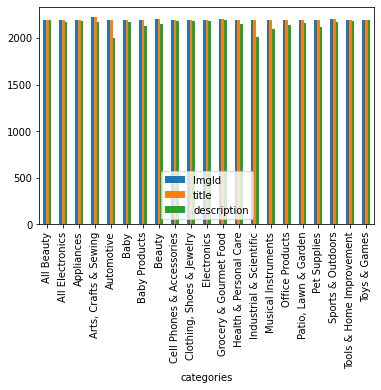

In [15]:
data_train.groupby('categories').count().plot(kind='bar')

We can see that there are entries without description. We shall first clean the data 

### Delete entries without description or title

In [16]:
np.where(pd.isnull(data_train))

(array([   68,   233,   250, ..., 46049, 46064, 46177]),
 array([2, 2, 2, ..., 2, 2, 2]))

In [17]:
data_train = data_train.drop(index=np.where(pd.isnull(data_train))[0])
data_test = data_test.drop(index=np.where(pd.isnull(data_test))[0])

In [18]:
data_train.groupby('categories').count()

,ImgId,title,description
categories,,,
All Beauty,2190,2190,2190
All Electronics,2176,2176,2176
Appliances,2181,2181,2181
"Arts, Crafts & Sewing",2175,2175,2175
Automotive,1999,1999,1999
Baby,2177,2177,2177
Baby Products,2131,2131,2131
Beauty,2149,2149,2149
Cell Phones & Accessories,2188,2188,2188


## Read Data

In [19]:
name_list_train = data_train['ImgId'].tolist()
name_list_test = data_test['ImgId'].tolist()
i = 0
img_train = []
for imgid in name_list_train:
  if path.exists('project/train/train/' + imgid + '.jpg'):
    img_train.append(mpimg.imread('project/train/train/' + imgid + '.jpg'))
    i+=1
  else:
    data_train = data_train.drop([data_train.index[i]])
    data_train = data_train.reset_index(drop=True)

i = 0
img_test = []
for imgid in name_list_test:
  if path.exists('project/test/test/' + imgid + '.jpg'):
    img_test.append(mpimg.imread('project/test/test/' + imgid + '.jpg'))
    i+=1
  else:
    data_test = data_test.drop([data_test.index[i]])
    data_test = data_test.reset_index(drop=True)

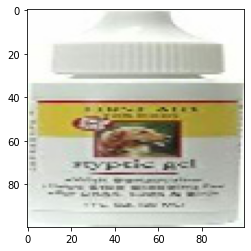

In [20]:
plt.imshow(img_train[40000])

In [21]:
data_train.description.loc[40000]

'Kwik Stop fast acting styptic Gel Formula with Benzocaine forms an instant gel barrier to stop bleeding fast.'

The data contained in data_train are now synchronized with the images and contains only data without NaN and only images that are contained in the folder image

## Data Vizualisation

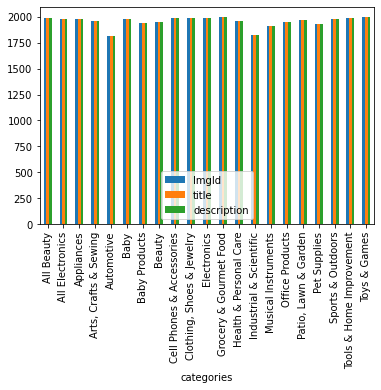

In [22]:
data_train.groupby('categories').count().plot(kind='bar')

We can see that there are a mean of 2000 products for each categories

In [23]:
data_train.description

0        Solder Pick for picking up molten solder when ...
1        We all screen. And we all need to protect thos...
2        Bringing you precision at a glance, the Casio ...
3        Factory-Reconditioned DEWALT DW260KR Heavy-Dut...
4        This twoway light features a bright flashlight...
                               ...                        
41046    Instruction DVD Short - Medium - Long - Color ...
41047    Formulated with real pineapple & papaya fruit ...
41048    Youth products are one of our top sellers for ...
41049    Sexy Lady's Long Sleeve Bodycon DressStyle: Wi...
41050    Goody is the World's most recognized manufactu...
Name: description, Length: 41051, dtype: object

In [48]:
nbWordsDescription = np.array([])
nbWordsTitle = np.array([])
for index, row in data_train.iterrows():
  nbWordsDescription = np.append(nbWordsDescription, len(row['description'].split()))
  nbWordsTitle = np.append(nbWordsTitle, len(row['title'].split()))

(array([  0., 147., 206., 348., 543., 675., 653., 677., 560., 595., 533.,
        500., 535., 500., 388., 428., 398., 454., 425., 408., 354., 398.,
        435., 421., 446., 398., 363., 363., 376., 471., 338., 360., 411.,
        377., 426., 379., 381., 411., 401., 405., 438., 375., 394., 521.,
        360., 347., 349., 291., 332., 335., 323., 304., 284., 288., 323.,
        261., 284., 276., 242., 272., 253., 277., 249., 228., 251., 281.,
        218., 297., 248., 228., 243., 215., 213., 229., 189., 229., 188.,
        181., 193., 199., 213., 221., 222., 186., 193., 194., 174., 189.,
        162., 152., 157., 162., 175., 158., 154., 134., 131., 106., 134.,
        140., 125., 123., 124., 109., 132., 158., 114., 129., 104.,  91.,
        119., 104., 122., 117., 115.,  87.,  78.,  92.,  98., 103.,  98.,
        101., 102.,  87.,  93.,  75.,  81.,  85.,  92.,  95., 103., 106.,
         77.,  89.,  97.,  80.,  66.,  84.,  79.,  78.,  70.,  79.,  85.,
         62.,  74.,  63.,  65.,  53., 

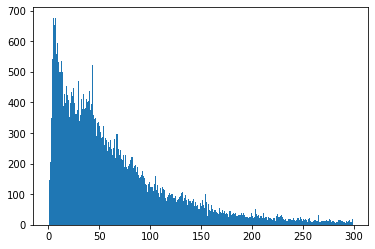

In [49]:
plt.hist(nbWordsDescription, bins=np.arange(300))

(array([0.000e+00, 1.240e+02, 5.320e+02, 1.357e+03, 3.055e+03, 4.789e+03,
        5.400e+03, 5.418e+03, 4.572e+03, 3.929e+03, 3.024e+03, 2.172e+03,
        1.711e+03, 1.219e+03, 8.370e+02, 6.040e+02, 3.930e+02, 3.270e+02,
        2.630e+02, 1.950e+02, 1.550e+02, 9.700e+01, 1.010e+02, 1.120e+02,
        8.300e+01, 6.700e+01, 5.600e+01, 4.500e+01, 3.000e+01, 2.500e+01,
        2.900e+01, 4.000e+01, 4.900e+01, 5.700e+01, 3.100e+01, 1.700e+01,
        1.600e+01, 2.100e+01, 1.900e+01, 1.700e+01, 8.000e+00, 3.000e+00,
        6.000e+00, 6.000e+00, 4.000e+00, 4.000e+00, 5.000e+00, 3.000e+00,
        2.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 49 Patch objects>)

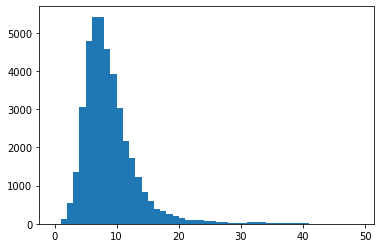

In [51]:
plt.hist(nbWordsTitle, bins=np.arange(50))

In [61]:
print("Minimum Number of words in description : ",nbWordsDescription.min(),"\nMaximum Number of words in description : ", nbWordsDescription.max(),"\nMean Number of words in description : ", nbWordsDescription.mean())

Minimum Number of words in description :  1.0 
Maximum Number of words in description :  1953.0 
Mean Number of words in description :  75.57158169106721


In [56]:
print("Minimum Number of words in title : ",nbWordsTitle.min(),"\nMaximum Number of words in title : ", nbWordsTitle.max(),"\nMean Number of words in title : ", nbWordsTitle.mean())

Minimum Number of words in title :  1.0 
Maximum Number of words in title :  89.0 
Mean Number of words in title :  8.433728776400088


We can see that the mean number of words in description is 75 Words, and in the title 8 Words

# Model Building

In [ ]:
from __future__ import print_function
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [ ]:
batch_size = 32
num_categories = 21 #fixed!
epochs = 10